In [1]:
import pandas as pd
import rdkit
from rdkit.Chem import MACCSkeys 
from rdkit.Chem import AllChem 
from rdkit import Chem

RDKit WARNING: [00:20:47] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
file=pd.read_csv("/Users/floralam/Downloads/drugs_smile.csv",sep="\t")
file

,drug_id,SMILES
0,1559,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1,1058,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
2,1088,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3,1549,CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...
4,1073,C1=C(C(=O)NC(=O)N1)F
...,...,...
164,1629,CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...
165,1799,C=CC(=O)N1CCCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(...
166,1835,CC(=CC(=O)OC1CC2=CC(CC3(C(O3)C4C1C(=C)C(=O)O4)...
167,1908,CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=C...


In [3]:
mol = file.SMILES.apply(Chem.MolFromSmiles)

# Data preprocessing 

### Topological Fingerprints

Using rdkit package to convert the smiles into topological fingerprints

In [4]:
topo_fp= mol.apply(Chem.RDKFingerprint)
topotopo=topo_fp.apply(lambda x: x.ToBitString())
file['topo']=topotopo.apply(lambda x:" ".join(x)) 
#It wasn't exactly necessary to add space, I wanted to be able to split the string below 
#(at the preprocessing of input data section)
file['topo'][0]

'0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1

### Morgan Fingerprint

Using rdkit package to convert the smiles into ecfp/morgan fingerprints

In [5]:
morgan=mol.apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024))
morganmorgan= morgan.apply(lambda x: x.ToBitString())
file["circular"]=morganmorgan.apply(lambda x: " ".join(x))
file

,drug_id,SMILES,topo,circular
0,1559,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...,0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 ...,0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,1058,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...,1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ...
2,1088,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...,1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 ...,0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,1549,CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...,1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ...
4,1073,C1=C(C(=O)NC(=O)N1)F,1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...
164,1629,CC1=CN=C(N=C1NCC2=CC=C(C=C2)N3C=CN=N3)C4=CC=CC...,1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 ...,0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
165,1799,C=CC(=O)N1CCCC(C1)N2C3=NC=NC(=C3C(=N2)C4=CC=C(...,1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 ...,0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
166,1835,CC(=CC(=O)OC1CC2=CC(CC3(C(O3)C4C1C(=C)C(=O)O4)...,1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 ...
167,1908,CC(C)NC1=NC=C(C(=C1)C2=CNC(=C2)C(=O)NC(CO)C3=C...,1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 ...,0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 ...


In [6]:
#changing drug_id to ascending order
file.sort_values(["drug_id"], axis=0,\
                 ascending=True, inplace=True)

In [7]:
#to check the condition of the fule
file

,drug_id,SMILES,topo,circular
154,1003,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
70,1004,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 ...
68,1005,N.N.[Cl-].[Cl-].[Pt+2],0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
71,1006,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
61,1007,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 ...,0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 ...
...,...,...,...,...
113,2110,C1CC(C1)NC2=NC=CC(=C2)C(=O)NCC(CN3CCC4=CC=CC=C...,1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 ...,0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
114,2111,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
87,2169,CC1=CN2C(=O)C=C(N=C2C(=C1)C(C)NC3=CC=CC=C3C(=O...,1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 ...,0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
107,2171,CC1(CCCN1C2=NN3C=CC=C3C(=N2)NC4=NNC(=C4)C5CC5)...,1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 ...,0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


### MACCS 

Using rdkit package to convert the smiles into maccs fingerprints

In [8]:
maccs= mol.apply(MACCSkeys.GenMACCSKeys)
maccsmaccs=maccs.apply(lambda x: x.ToBitString())
file["maccs"]=maccsmaccs.apply(lambda x: " ".join(x))

In [9]:
file.to_csv("rdkit_fp_copy.csv", index=False)

### Merging of files to get ic50

Since the files for drug id and smiles, and the ic50 values are separated, they needed to be merged together for future use (in the regression models)

In [10]:
fpfile= pd.read_csv("/Users/floralam/rdkit_fp_copy.csv")
drugic= pd.read_csv("/Users/floralam/Downloads/DrugData.csv").drop(['TCGA_DESC'], axis=1)
drugic.columns=['cosmic_id','cell_line','drug_id','ic50','z_score']
drugic.head()

,cosmic_id,cell_line,drug_id,ic50,z_score
0,910927,CAL-51,1003,-3.521093,-0.686816
1,749712,HCC1395,1003,-2.309078,-0.096212
2,908122,MDA-MB-453,1003,-2.014633,0.047269
3,910852,CAL-85-1,1003,-1.177570,0.455162
4,906844,DU-4475,1003,-4.271105,-1.052290


In [11]:
newfile= pd.merge(drugic,fpfile)
newfile

,cosmic_id,cell_line,drug_id,ic50,z_score,SMILES,topo,circular,maccs
0,910927,CAL-51,1003,-3.521093,-0.686816,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,749712,HCC1395,1003,-2.309078,-0.096212,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,908122,MDA-MB-453,1003,-2.014633,0.047269,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,910852,CAL-85-1,1003,-1.177570,0.455162,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
4,906844,DU-4475,1003,-4.271105,-1.052290,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...,...,...
7426,905951,BT-549,2172,3.098801,0.133899,CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...,1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ...
7427,906862,EVSA-T,2172,-1.061746,-2.259969,CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...,1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ...
7428,907046,HCC1569,2172,2.003400,-0.496365,CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...,1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ...
7429,749709,HCC1954,2172,5.263321,1.379307,CC1=C(SC2=C1C(=NC(C3=NN=C(N32)C)CC(=O)OC(C)(C)...,1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 ...


In [12]:
newfile= newfile.drop(['cosmic_id', 'z_score'],axis=1)

In [13]:
##picking particular cell line, CAL-51
#needed to isolate a cell line, otherwise the same drug will have different ic50 values due to the different cell lines
data= newfile[newfile['cell_line'].str.contains('CAL-51',na=False)]
data

,cell_line,drug_id,ic50,SMILES,topo,circular,maccs
0,CAL-51,1003,-3.521093,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
49,CAL-51,1004,-5.008028,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
93,CAL-51,1005,2.492692,N.N.[Cl-].[Cl-].[Pt+2],0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
143,CAL-51,1006,-1.082517,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
187,CAL-51,1007,-4.886498,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 ...,0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...
7205,CAL-51,2109,1.913550,CC1CN(CC(N1)C)C2=NC=C(C(=C2)C)C3=CC=C(C=C3)C4=...,1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7249,CAL-51,2110,3.605307,C1CC(C1)NC2=NC=CC(=C2)C(=O)NCC(CN3CCC4=CC=CC=C...,1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 ...,0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ...
7293,CAL-51,2111,2.103111,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7337,CAL-51,2169,5.497304,CC1=CN2C(=O)C=C(N=C2C(=C1)C(C)NC3=CC=CC=C3C(=O...,1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 ...,0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [14]:
#removing unnecessary cell line column
data.drop(['cell_line'], axis=1)

,drug_id,ic50,SMILES,topo,circular,maccs
0,1003,-3.521093,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...,1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
49,1004,-5.008028,CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
93,1005,2.492692,N.N.[Cl-].[Cl-].[Pt+2],0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
143,1006,-1.082517,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)O,1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
187,1007,-4.886498,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 ...,0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...,...,...,...,...
7205,2109,1.913550,CC1CN(CC(N1)C)C2=NC=C(C(=C2)C)C3=CC=C(C=C3)C4=...,1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7249,2110,3.605307,C1CC(C1)NC2=NC=CC(=C2)C(=O)NCC(CN3CCC4=CC=CC=C...,1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 ...,0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 ...
7293,2111,2.103111,CS(=O)(=O)C1=CC=C(C=C1)C2=CN=C(C(=N2)C(=O)NC3=...,1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7337,2169,5.497304,CC1=CN2C(=O)C=C(N=C2C(=C1)C(C)NC3=CC=CC=C3C(=O...,1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 ...,0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


# Training models (Topological Fingerprint)

In [15]:
#importing necessary libraries
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [16]:
#data.to_csv("cyinputdata_copy.csv", index=False)
data= pd.read_csv("/Users/floralam/cyinputdata_copy.csv").drop(['cell_line'], axis=1)

### Pre-processing of input data

In [17]:
import numpy as np

In [18]:
topo=data['topo']
topo_x= topo.apply(lambda x: np.fromstring(x,dtype=int, sep=' '))
X=topo_x
y=data['ic50']

In [19]:
X=pd.DataFrame(columns=[np.arange(1,2049)])
#
for i in range(0,len(topo_x)):
    X = X.append( pd.Series(topo_x[i], index=X.columns ),ignore_index=True)
X

,1,2,3,4,5,6,7,8,9,10,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,1,1,1,0,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,1,1,0,1,1,...,1,1,0,1,1,1,0,1,1,1
4,1,1,1,1,0,1,1,0,1,1,...,1,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1,1,1,1,0,1,1,1,0,1,...,1,0,0,1,1,1,0,1,0,1
162,1,1,1,0,1,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,1
163,1,1,0,1,0,1,0,0,0,0,...,1,1,0,1,0,1,1,0,0,1
164,1,1,0,1,1,1,0,0,0,1,...,1,0,1,1,1,0,1,1,0,1


In [20]:
y

0     -3.521093
1     -5.008028
2      2.492692
3     -1.082517
4     -4.886498
         ...   
161    1.913550
162    3.605307
163    2.103111
164    5.497304
165    3.708490
Name: ic50, Length: 166, dtype: float64

### Linear Regression Model

In [22]:
#creating test and training set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
model= LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("The model score for linear regression model is",model.score(X_test,y_test))
#determining the accuracy
linreg_error=abs(y_pred-y_test)
linreg_mape=100*(linreg_error/y_test)
print("The accuracy score for linear regression model is",100-np.mean(linreg_mape))

The model score for linear regression model is -3.767486037994898e+22
The accuracy score for linear regression model is -21555539930583.164


### Random Forest 

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
rfmodel= RandomForestRegressor(n_estimators=100)
rfmodel.fit(X_train,y_train)

#without feature selection
#score gives you correlation
rf_predict=rfmodel.predict(X_test)

print("The correlation score for training set is:",rfmodel.score(X_train,y_train))
print("The correlation score for test set is:",rfmodel.score(X_test,y_test))

#determining the accuracy
errors=abs(rf_predict-y_test)
mape=100*(errors/y_test)
print("The accuracy score for random forest model is",100-np.mean(mape))

The correlation score for training set is: 0.8879274977332791
The correlation score for test set is: 0.18403110543441548
The accuracy score for random forest model is 76.47653918094059


### Support Vector Regression

In [24]:
#importing necessary files
from sklearn.svm import SVR

#creating test and training set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
svrmodel= SVR(C=1.0, epsilon=0.2)
svrmodel.fit(X_train,y_train)

svr_predict=svrmodel.predict(X_test)

#Accordint to the documentation, the score returns the coefficient of determination R^2 of the prediction
print("The R^2 value for training set is:",svrmodel.score(X_train,y_train))
print("The R^2 value for test set is:",svrmodel.score(X_test,y_test))

#determining the accuracy
svrerrors=abs(svr_predict-y_test)
svrmape=100*(svrerrors/y_test)
print("The accuracy score for svr model is",100-np.mean(svrmape))

The R^2 value for training set is: 0.47684616468069385
The R^2 value for test set is: 0.10097947060545376
The accuracy score for svr model is 94.5880273508109


__Summary of data__
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -21555539930583.164 <br>
Random forest: 76.47653918094059 <br>
SVR: 94.5880273508109 <br>

## Feature selection
Too many features in a fingerprint. We need to reduce the features so that we can improve the accuracy of all the models

In [25]:
import pandas as pd
#with feature selection 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
rf=RandomForestRegressor()
feature_importance= pd.DataFrame(rfmodel.feature_importances_,\
                                   index = X_train.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)

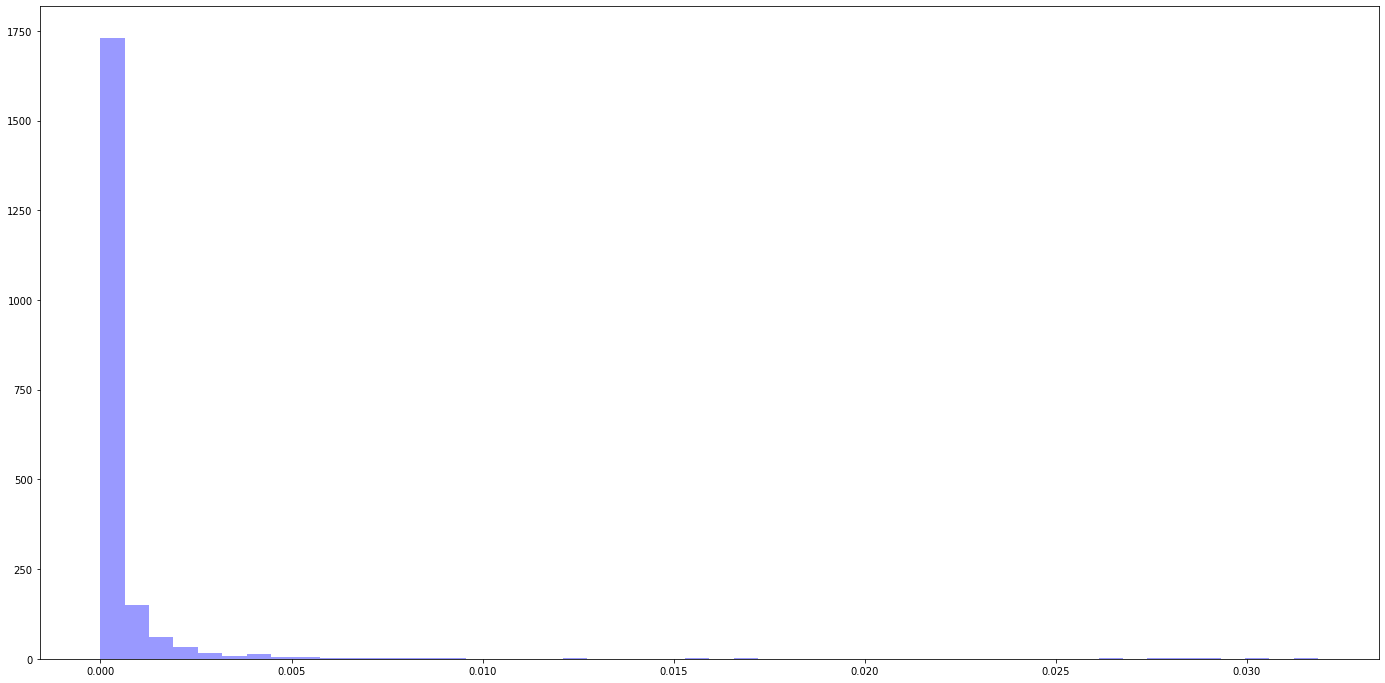

In [26]:
#identifying the relative importance of features within a fingerprint
import seaborn as sb
#histogram without feature selection
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_importance, kde = False, color = "blue")

In [27]:
#select these indexes and get those respective features from X
topo_features=feature_importance[0:100]
topo_features

,importance
506,0.031858
1250,0.030534
775,0.028718
1641,0.028455
437,0.027570
...,...
206,0.002113
410,0.002054
728,0.001993
1299,0.001992


In [28]:
#seeing the top 100 features with higher importance
print(X[topo_features.index])

    506  1250 775  1641 437  217  548  1153 1237 420   ... 302  1045 1228  \
0      0    1    0    1    1    1    0    1    1    0  ...    1    1    1   
1      1    1    1    1    1    1    1    1    1    1  ...    1    1    1   
2      0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3      0    0    0    0    0    1    1    1    0    1  ...    0    0    0   
4      1    1    0    1    1    1    1    1    1    1  ...    1    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
161    1    1    0    0    1    1    0    0    0    1  ...    1    1    0   
162    0    0    0    1    1    1    0    0    0    0  ...    0    0    0   
163    1    1    0    0    0    0    1    0    0    0  ...    0    1    1   
164    0    0    0    1    0    0    0    0    1    1  ...    0    0    1   
165    1    0    0    1    0    0    0    1    1    1  ...    0    1    0   

    1248 190  206  410  728  1299 417   
0      1    1    0    1    1    1 

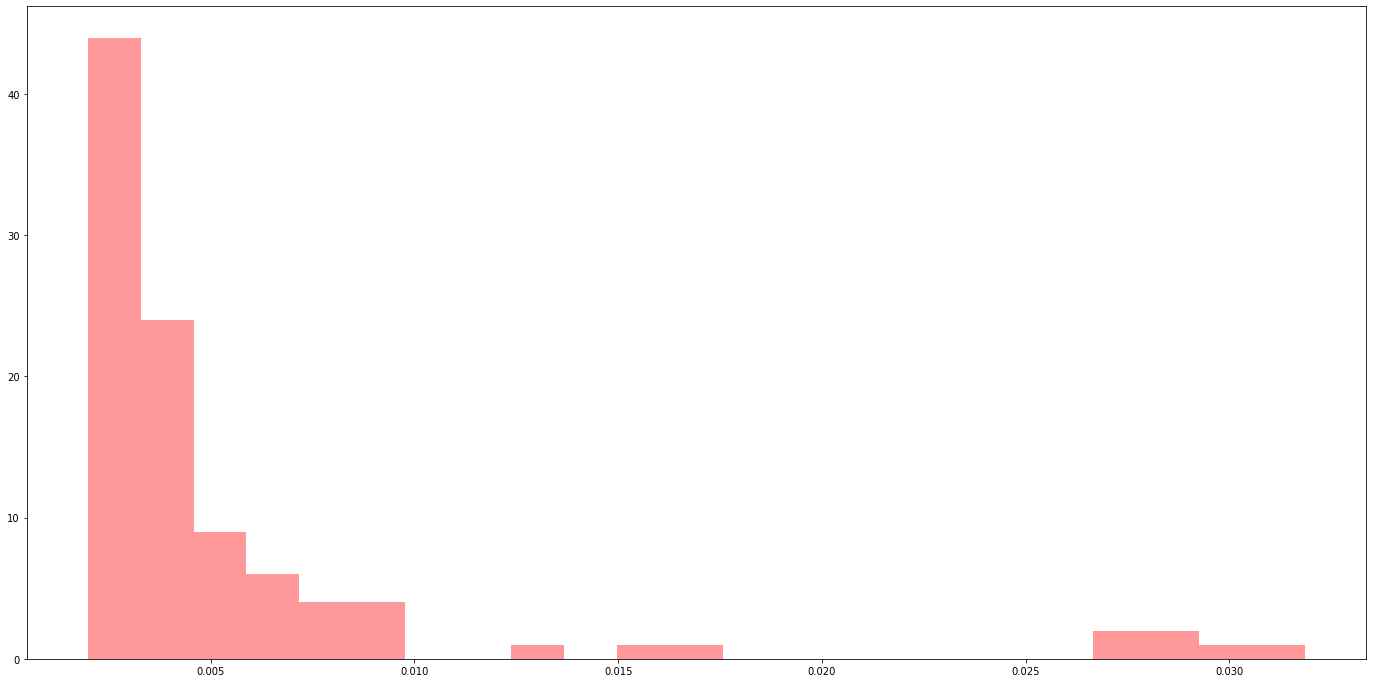

In [29]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(topo_features, kde = False, color = "red")

## After feature selection
Testing if the model performs better after feature selection

### Linear Regression model (after feature selection)

In [31]:
#creating test and training set after feature selection
X_feat_train,X_feat_test,y_feat_train,y_feat_test=train_test_split(X[topo_features.index],y,test_size=0.3,random_state=0)
featmodel= LinearRegression()
featmodel.fit(X_feat_train,y_feat_train)
y_featpred=featmodel.predict(X_feat_test)

#new model score after feature selection
print("The model score for linear regression model is",featmodel.score(X_feat_test,y_test))

#determining the accuracy score
linreg_error=abs(y_featpred-y_feat_test)
linreg_mape=100*(linreg_error/y_feat_test)
print("The accuracy score for linear regression model is:",100-np.mean(linreg_mape))

The model score for linear regression model is -1.7645844436318792
The accuracy score for linear regression model is: -24.00507021797179


### Random forest model (after feature selection)

In [32]:
newrfmodel= RandomForestRegressor(n_estimators=100)
newrfmodel.fit(X_feat_train,y_feat_train)
newrf_predict=newrfmodel.predict(X_feat_test)

#determining the accuracy
newrferrors=abs(newrf_predict-y_feat_test)
newrfmape=100*(newrferrors/y_feat_test)
print("The accuracy score for random forest model is",100-np.mean(newrfmape))

The accuracy score for random forest model is 74.5470275931456


### Support Vector Regression

In [33]:
newsvrmodel= SVR(C=1.0, epsilon=0.2)
newsvrmodel.fit(X_feat_train,y_feat_train)

newsvr_predict=newsvrmodel.predict(X_feat_test)
#determining the accuracy
newsvrerrors=abs(newsvr_predict-y_feat_test)
newsvrmape=100*(newsvrerrors/y_feat_test)
print("The accuracy score for svr model is:",100-np.mean(newsvrmape))

The accuracy score for svr model is: 94.86852343883231


__Summary of data__ (After feature selection)
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -24.00507021797179 <br>
Random forest: 74.5470275931456 <br>
SVR: 94.86852343883231 <br>

---

# Training models (Morgan/ECFP/Circular Fingerprint)


In [34]:
morganfp=data['circular']
morganfp_x= morganfp.apply(lambda x: np.fromstring(x,dtype=int, sep=' '))
Xm=morganfp_x
y=data['ic50']
len(Xm[0])

1024

In [35]:
Xm=pd.DataFrame(columns=[np.arange(1,1025)])
#
for i in range(0,len(topo_x)):
    Xm = Xm.append( pd.Series(morganfp_x[i], index=Xm.columns ),ignore_index=True)
Xm

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
162,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Linear regression model (before feature selection)
Using Morgan fingerprints

In [36]:
from sklearn.metrics import accuracy_score
#creating test and training set
Xm_train,Xm_test,ym_train,ym_test=train_test_split(Xm,y,test_size=0.3,random_state=0)
model= LinearRegression()
model.fit(Xm_train,ym_train)
ym_pred=model.predict(Xm_test)

#determining the model score
print("The model score is:", model.score(Xm_test,ym_test))

#determining the accuracy score
linreg_error=abs(ym_pred-ym_test)
linreg_mape=100*(linreg_error/ym_test)
print("The accuracy score for linear regression model is:",100-np.mean(linreg_mape))

The model score is: -5.901199801144518e+27
The accuracy score for linear regression model is: -2943775232157180.0


### Random Forest model (before feature selection)
Using Morgan fingerprints

In [37]:
rfmodel= RandomForestRegressor(n_estimators=100)
rfmodel.fit(Xm_train,ym_train)

#score gives you correlation
rf_predict=rfmodel.predict(Xm_test)
print("The correlation score for training set is:",rfmodel.score(Xm_train,ym_train))
print("The correlation score for training set is:",rfmodel.score(Xm_test,ym_test))

#determining the accuracy
errors=abs(rf_predict-ym_test)
mape=100*(errors/ym_test)
print("The accuracy score for rf model is:",100-np.mean(mape))

The correlation score for training set is: 0.8801245428334479
The correlation score for training set is: 0.13260960737077887
The accuracy score for rf model is: 76.4670978774818


### Support Vector Regression model (before feature selection)
Using Morgan fingerprints

In [38]:
svrmodel= SVR(C=1.0, epsilon=0.2)
svrmodel.fit(Xm_train,ym_train)

svr_predict=svrmodel.predict(Xm_test)

#According to the documentation, the score returns the coefficient of determination R^2 of the prediction
print("The R^2 value for training set is:",svrmodel.score(Xm_train,ym_train))
print("The R^2 value for test set is",svrmodel.score(Xm_test,ym_test))

#determining the accuracy
svrerrors=abs(svr_predict-ym_test)
svrmape=100*(svrerrors/ym_test)
print("The accuracy score for svr model is:",100-np.mean(svrmape))

The R^2 value for training set is: 0.4080444244302437
The R^2 value for test set is 0.014146692720361951
The accuracy score for svr model is: 90.20519230332191


__Summary of data__
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -2943775232157180.0 <br>
Random forest: 76.4670978774818 <br>
SVR: 90.20519230332191 <br>

## Feature Selection

Using random forest to carry out feature selection

In [39]:
rf=RandomForestRegressor()
feature_importance= pd.DataFrame(rfmodel.feature_importances_,\
                                   index = Xm_train.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)

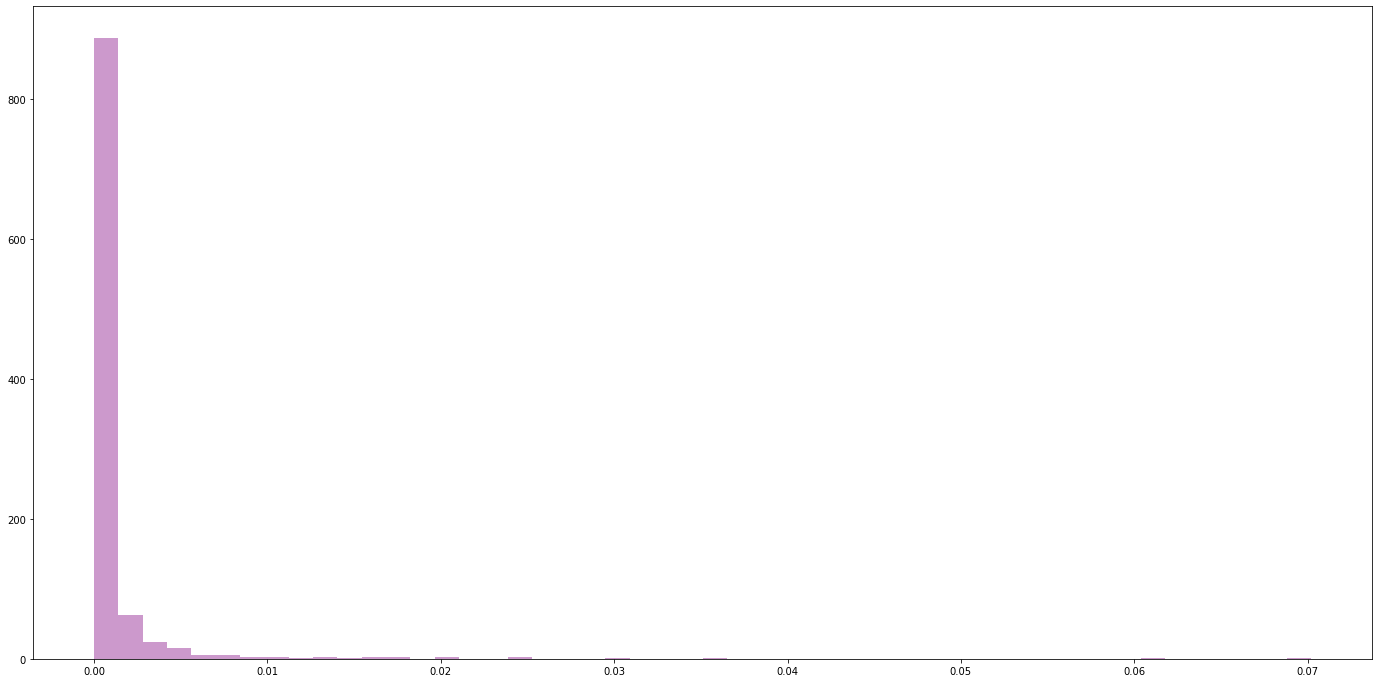

In [40]:
#histogram without feature selection
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_importance, kde = False, color = "purple")

In [41]:
morgan_features=feature_importance[0:100]
morgan_features

,importance
63,0.070213
792,0.060676
362,0.035116
131,0.030196
831,0.025102
...,...
137,0.002045
840,0.002036
371,0.002034
351,0.002018


In [42]:
print(Xm[morgan_features.index])

    63  792 362 131 831 12  68  698 127 607  ... 464 91  429 978 947 137 840  \
0     0   0   1   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     0   1   1   1   1   1   1   0   0   0  ...   0   1   0   0   1   0   1   
2     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     1   0   0   0   0   0   0   0   0   1  ...   1   0   0   0   0   0   0   
4     0   0   1   1   0   1   0   1   0   1  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
161   0   0   0   0   0   0   0   0   0   0  ...   0   1   1   0   0   1   0   
162   0   0   1   0   0   0   0   0   0   1  ...   0   0   1   0   0   0   0   
163   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   1   0   
164   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
165   0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   1   0   

    371 351 34   
0     0   0   1  
1  

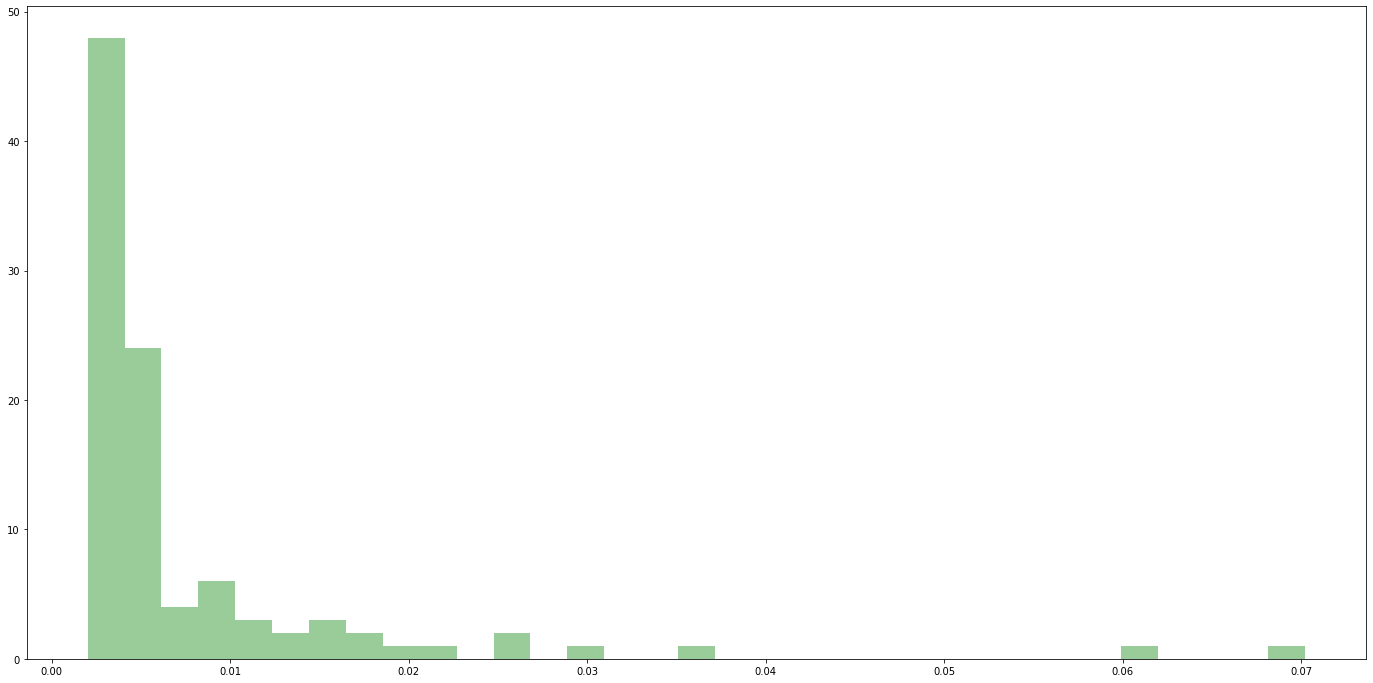

In [43]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(morgan_features, kde = False, color = "green")

## After feature selection

### Linear Regression model

In [44]:
#creating test and training set after feature selection
Xm_feat_train,Xm_feat_test,ym_feat_train,ym_feat_test=train_test_split(Xm[morgan_features.index],y,test_size=0.3,random_state=0)
mfeatmodel= LinearRegression()
mfeatmodel.fit(Xm_feat_train,ym_feat_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
ym_feat_pred= mfeatmodel.predict(Xm_feat_test)

#determining the model score
print("The model score is:", mfeatmodel.score(Xm_feat_test,ym_feat_test))

#determining the accuracy score
linreg_error=abs(ym_feat_pred-ym_feat_test)
linreg_mape=100*(linreg_error/ym_feat_test)
print("The accuracy score for linear regression model is:",100-np.mean(linreg_mape))

The model score is: -3.039404382776095
The accuracy score for linear regression model is: -32.89638840239334


### Random Forest

In [46]:
mrfmodel= RandomForestRegressor(n_estimators=100)
mrfmodel.fit(Xm_feat_train,ym_feat_train)

#score gives you correlation
mrf_predict=mrfmodel.predict(Xm_feat_test)
print("The correlation score for training set is:",mrfmodel.score(Xm_feat_train,ym_feat_train))
print("The correlation score for training set is:",mrfmodel.score(Xm_feat_test,ym_feat_test))

#determining the accuracy
errors=abs(mrf_predict-ym_feat_test)
mape=100*(errors/ym_feat_test)
print("The accuracy score for rf model is:",100-np.mean(mape))

The correlation score for training set is: 0.9075871589038863
The correlation score for training set is: 0.07827491312948465
The accuracy score for rf model is: 62.0290155802559


### Support Vector Regression

In [48]:
svr_feat_model= SVR(C=1.0, epsilon=0.2)
svr_feat_model.fit(Xm_feat_train,ym_feat_train)

svr_feat_predict=svr_feat_model.predict(Xm_feat_test)
print("The R^2 value for training set is:",svr_feat_model.score(Xm_feat_train,ym_feat_train))
print("The R^2 value for test set is",svr_feat_model.score(Xm_feat_test,ym_feat_test))

#determining the accuracy
svr_feat_errors=abs(svr_feat_predict-ym_feat_test)
svr_feat_mape=100*(svr_feat_errors/ym_feat_test)
print("The accuracy score for svr model is:",100-np.mean(svr_feat_mape))

The R^2 value for training set is: 0.6211238435422102
The R^2 value for test set is 0.07764997067161283
The accuracy score for svr model is: 76.35776123443758


__Summary of data (after feature selection)__
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -32.89638840239334 <br>
Random forest: 62.0290155802559<br>
SVR: 76.35776123443758 <br>

---

# Training models (Maccs Fingerprint)


In [49]:
maccsfp=data['maccs']
maccsfp_x= maccsfp.apply(lambda x: np.fromstring(x,dtype=int, sep=' '))
Xmac=maccsfp_x
y=data['ic50']
len(Xmac[0])

167

In [50]:
Xmac=pd.DataFrame(columns=[np.arange(1,168)])
#
for i in range(0,len(topo_x)):
    Xmac = Xmac.append( pd.Series(maccsfp_x[i], index=Xmac.columns ),ignore_index=True)
Xmac

,1,2,3,4,5,6,7,8,9,10,...,158,159,160,161,162,163,164,165,166,167
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
162,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
163,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
164,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


### Linear regression model (before feature selection)
Using Maccs fingerprints

In [51]:
#creating test and training set
X_mac_train,X_mac_test,y_mac_train,y_mac_test=train_test_split(Xmac,y,test_size=0.3,random_state=0)
model= LinearRegression()
model.fit(X_mac_train,y_mac_train)
y_mac_pred=model.predict(X_mac_test)

#determining the model score
print("The model score is:", model.score(X_mac_test,y_mac_test))

#determining the accuracy score
linreg_error=abs(y_mac_pred-y_mac_test)
linreg_mape=100*(linreg_error/y_mac_test)
print("The accuracy score for linear regression model is:",100-np.mean(linreg_mape))

The model score is: -8.90762871856541e+22
The accuracy score for linear regression model is: -15350409125293.8


### Random Forest model (before feature selection)
Using Maccs fingerprints

In [52]:
rfmodel= RandomForestRegressor(n_estimators=100)
rfmodel.fit(X_mac_train,y_mac_train)

#score gives you correlation
rf_predict=rfmodel.predict(X_mac_test)
print("The correlation score for training set is:",rfmodel.score(X_mac_train,y_mac_train))
print("The correlation score for training set is:",rfmodel.score(X_mac_test,y_mac_test))
#determining the accuracy
errors=abs(rf_predict-y_mac_test)
mape=100*(errors/y_mac_test)
print("The accuracy score for rf model is:",100-np.mean(mape))

The correlation score for training set is: 0.8568754110373129
The correlation score for training set is: 0.326829287271992
The accuracy score for rf model is: 60.1961016362716


### Support Vector Regression model (before feature selection)
Using Morgan fingerprints

In [53]:
svrmodel= SVR(C=1.0, epsilon=0.2)
svrmodel.fit(X_mac_train,y_mac_train)

svr_predict=svrmodel.predict(X_mac_test)

#According to the documentation, the score returns the coefficient of determination R^2 of the prediction
print("The R^2 value for training set is:",svrmodel.score(X_mac_train,y_mac_train))
print("The R^2 value for test set is",svrmodel.score(X_mac_test,y_mac_test))

#determining the accuracy
svrerrors=abs(svr_predict-y_mac_test)
svrmape=100*(svrerrors/y_mac_test)
print("The accuracy score for svr model is:",100-np.mean(svrmape))

The R^2 value for training set is: 0.30261458697956756
The R^2 value for test set is 0.13391732873182705
The accuracy score for svr model is: 75.740677699616


__Summary of data__
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -15350409125293.8 <br>
Random forest: 60.1961016362716 <br>
SVR: 75.740677699616 <br>

## Feature Selection

Using random forest to carry out feature selection

In [54]:
rf=RandomForestRegressor()
feature_importance= pd.DataFrame(rfmodel.feature_importances_,\
                                   index = X_mac_train.columns,\
                                   columns=['importance']).sort_values('importance', ascending=False)

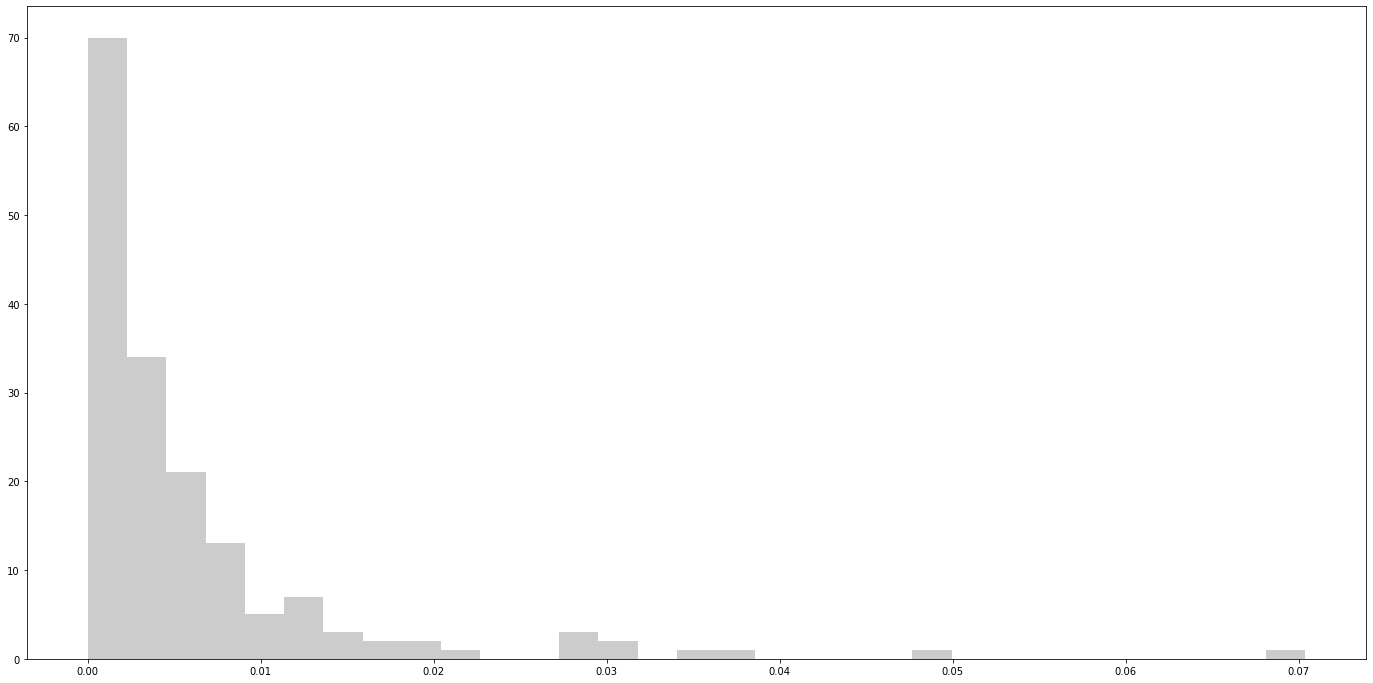

In [55]:
#histogram without feature selection
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(feature_importance, kde = False, color = "grey")

In [56]:
maccs_features=feature_importance[0:100]
maccs_features

,importance
124,0.070371
42,0.047853
132,0.037735
73,0.034784
90,0.031216
...,...
148,0.002303
72,0.002280
125,0.002232
82,0.002200


In [57]:
print(Xmac[maccs_features.index])

    124 42  132 73  90  14  137 117 54  141  ... 129 120 118 167 41  148 72   \
0     1   0   0   1   1   0   1   0   0   1  ...   1   0   1   0   0   0   0   
1     1   0   1   1   1   0   1   1   0   1  ...   1   0   0   0   0   1   0   
2     0   0   1   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
3     0   0   1   1   1   0   0   0   1   1  ...   0   0   1   0   0   0   0   
4     1   0   1   1   1   0   1   1   0   1  ...   0   0   1   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
161   0   0   1   0   0   0   0   0   0   0  ...   1   0   1   0   0   0   0   
162   0   0   1   0   0   0   0   0   0   0  ...   1   0   1   0   0   1   0   
163   0   0   1   0   0   0   1   0   1   0  ...   0   0   1   0   0   0   0   
164   1   0   1   0   0   0   1   0   1   1  ...   1   0   1   0   0   1   0   
165   1   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   

    125 82  158  
0     0   0   1  
1  

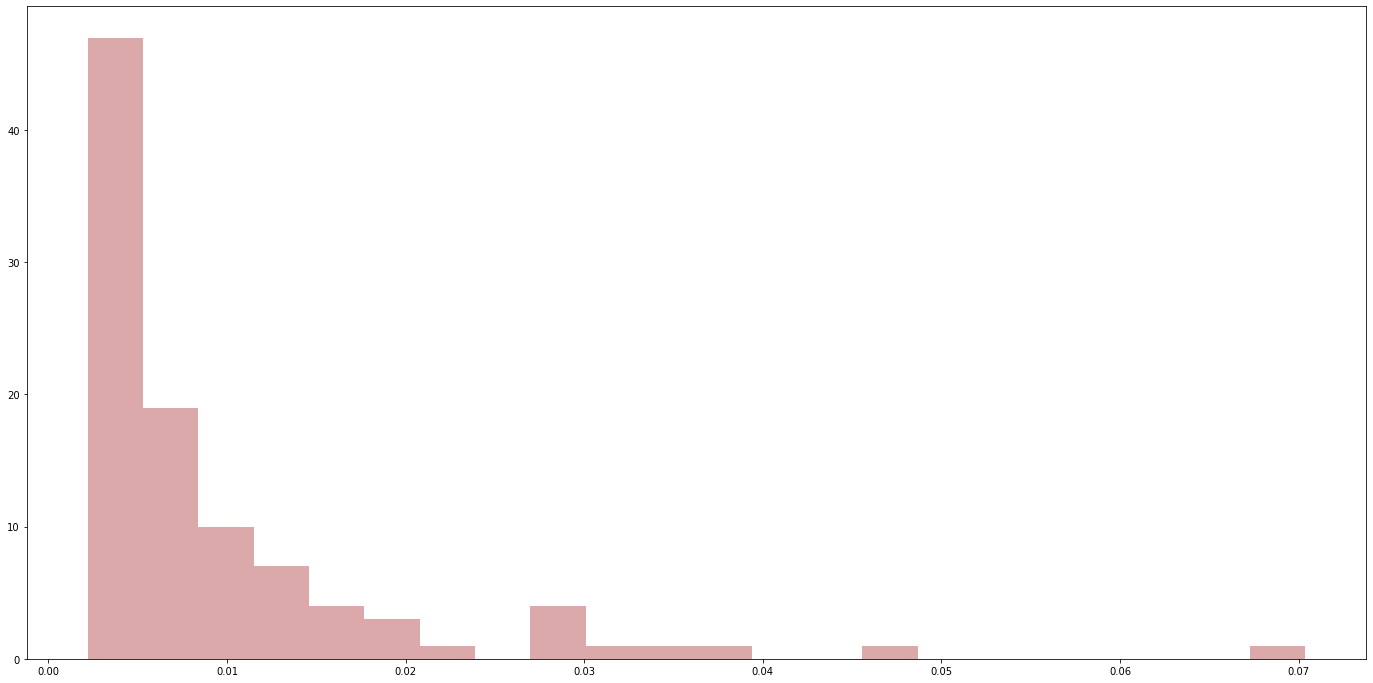

In [58]:
#plotting histogram for features after feature selection
import seaborn as sb

f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(maccs_features, kde = False, color = "brown")

## After feature selection

### Linear Regression model

In [59]:
#creating test and training set after feature selection
X_macfeat_train,X_macfeat_test,y_macfeat_train,y_macfeat_test=train_test_split(Xmac[maccs_features.index],y,test_size=0.3,random_state=0)
model= LinearRegression()
model.fit(X_macfeat_train,y_macfeat_train)

y_macfeat_pred= model.predict(X_macfeat_test)

#determining the model score
print("The model score is:", model.score(X_macfeat_test,y_macfeat_test))

#determining the accuracy score
linreg_error=abs(y_macfeat_pred-y_macfeat_test)
linreg_mape=100*(linreg_error/y_macfeat_test)
print("The accuracy score for linear regression model is:",100-np.mean(linreg_mape))

The model score is: -15.831756059077588
The accuracy score for linear regression model is: -44.64269708142058


### Random Forest

In [60]:
rfmodel= RandomForestRegressor(n_estimators=100)
rfmodel.fit(X_macfeat_train,y_macfeat_train)

#score gives you correlation
rf_predict=rfmodel.predict(X_macfeat_test)
print("The correlation score for training set is:",rfmodel.score(X_macfeat_train,y_macfeat_train))
print("The correlation score for training set is:",rfmodel.score(X_macfeat_test,y_macfeat_test))

#determining the accuracy
errors=abs(rf_predict-y_macfeat_test)
mape=100*(errors/y_macfeat_test)
print("The accuracy score for rf model is:",100-np.mean(mape))

The correlation score for training set is: 0.8792233799208453
The correlation score for training set is: 0.29456096181131874
The accuracy score for rf model is: 57.60649340291472


### Support Vector Regression

In [61]:
svr_model= SVR(C=1.0, epsilon=0.2)
svr_model.fit(X_macfeat_train,y_macfeat_train)

svr_predict=svr_model.predict(X_macfeat_test)
#determining the accuracy
errors=abs(svr_predict-y_macfeat_test)
mape=100*(errors/y_macfeat_test)
print("The accuracy score for svr model is:",100-np.mean(mape))

The accuracy score for svr model is: 73.73610360893872


__Summary of data (after feature selection)__
<br>
The accuracy scores for the various models are as follows:<br>
Linear regression: -44.64269708142058 <br>
Random forest: 57.60649340291472 <br>
SVR: 73.73610360893872 <br>